<a href="https://colab.research.google.com/github/Voztok94/Homework7/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Fashion-MNIST dataset instead of MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

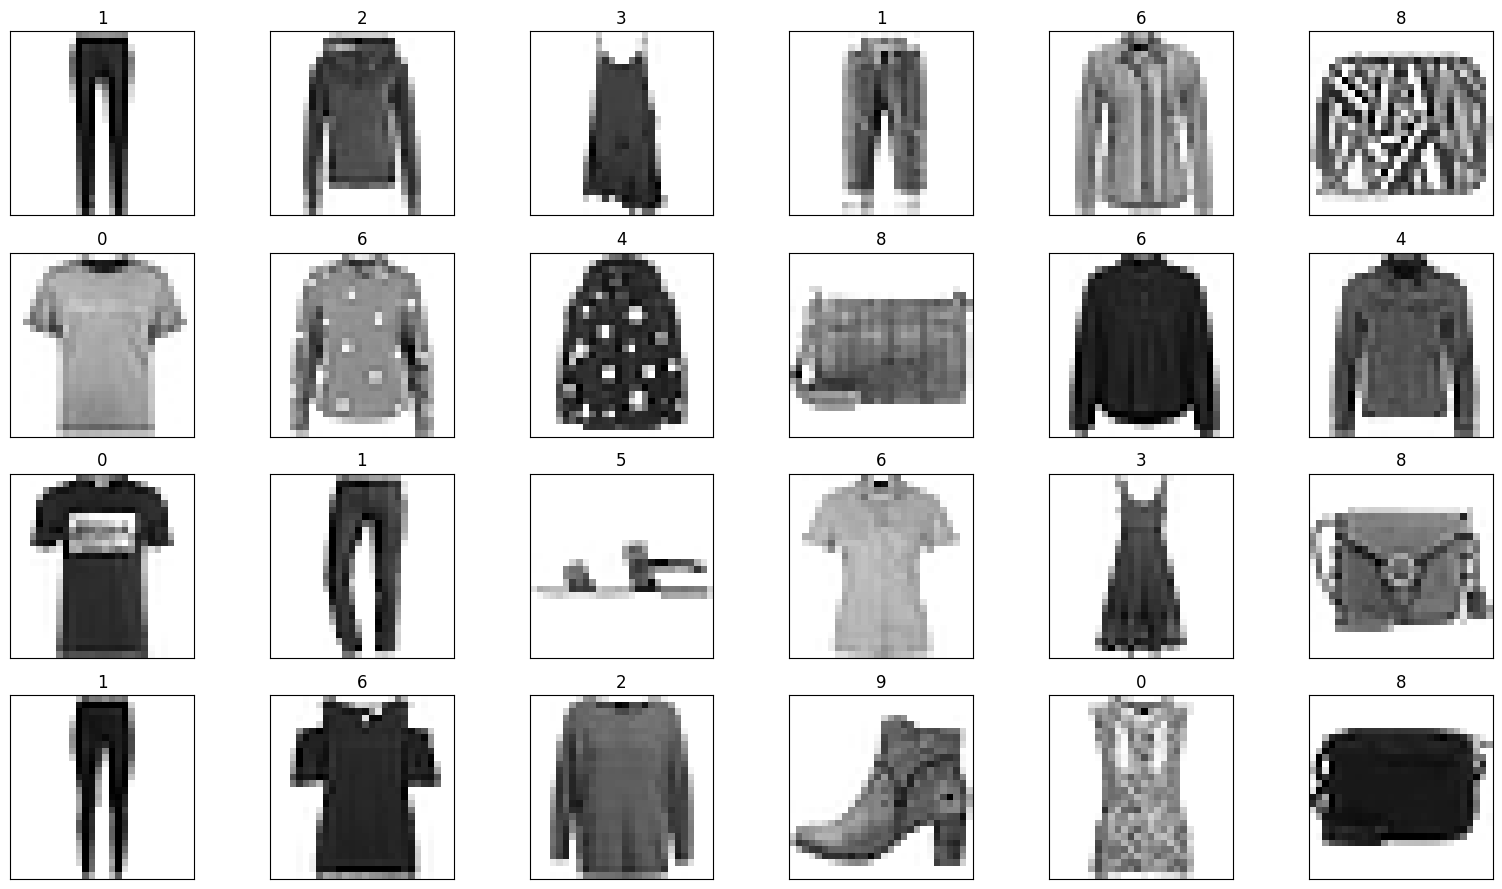

In [4]:
# Visualization
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [5]:
# Reshaping and normalization
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

from tensorflow.keras.utils import to_categorical, plot_model
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D


In [6]:
# Building the CNN
cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

cnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

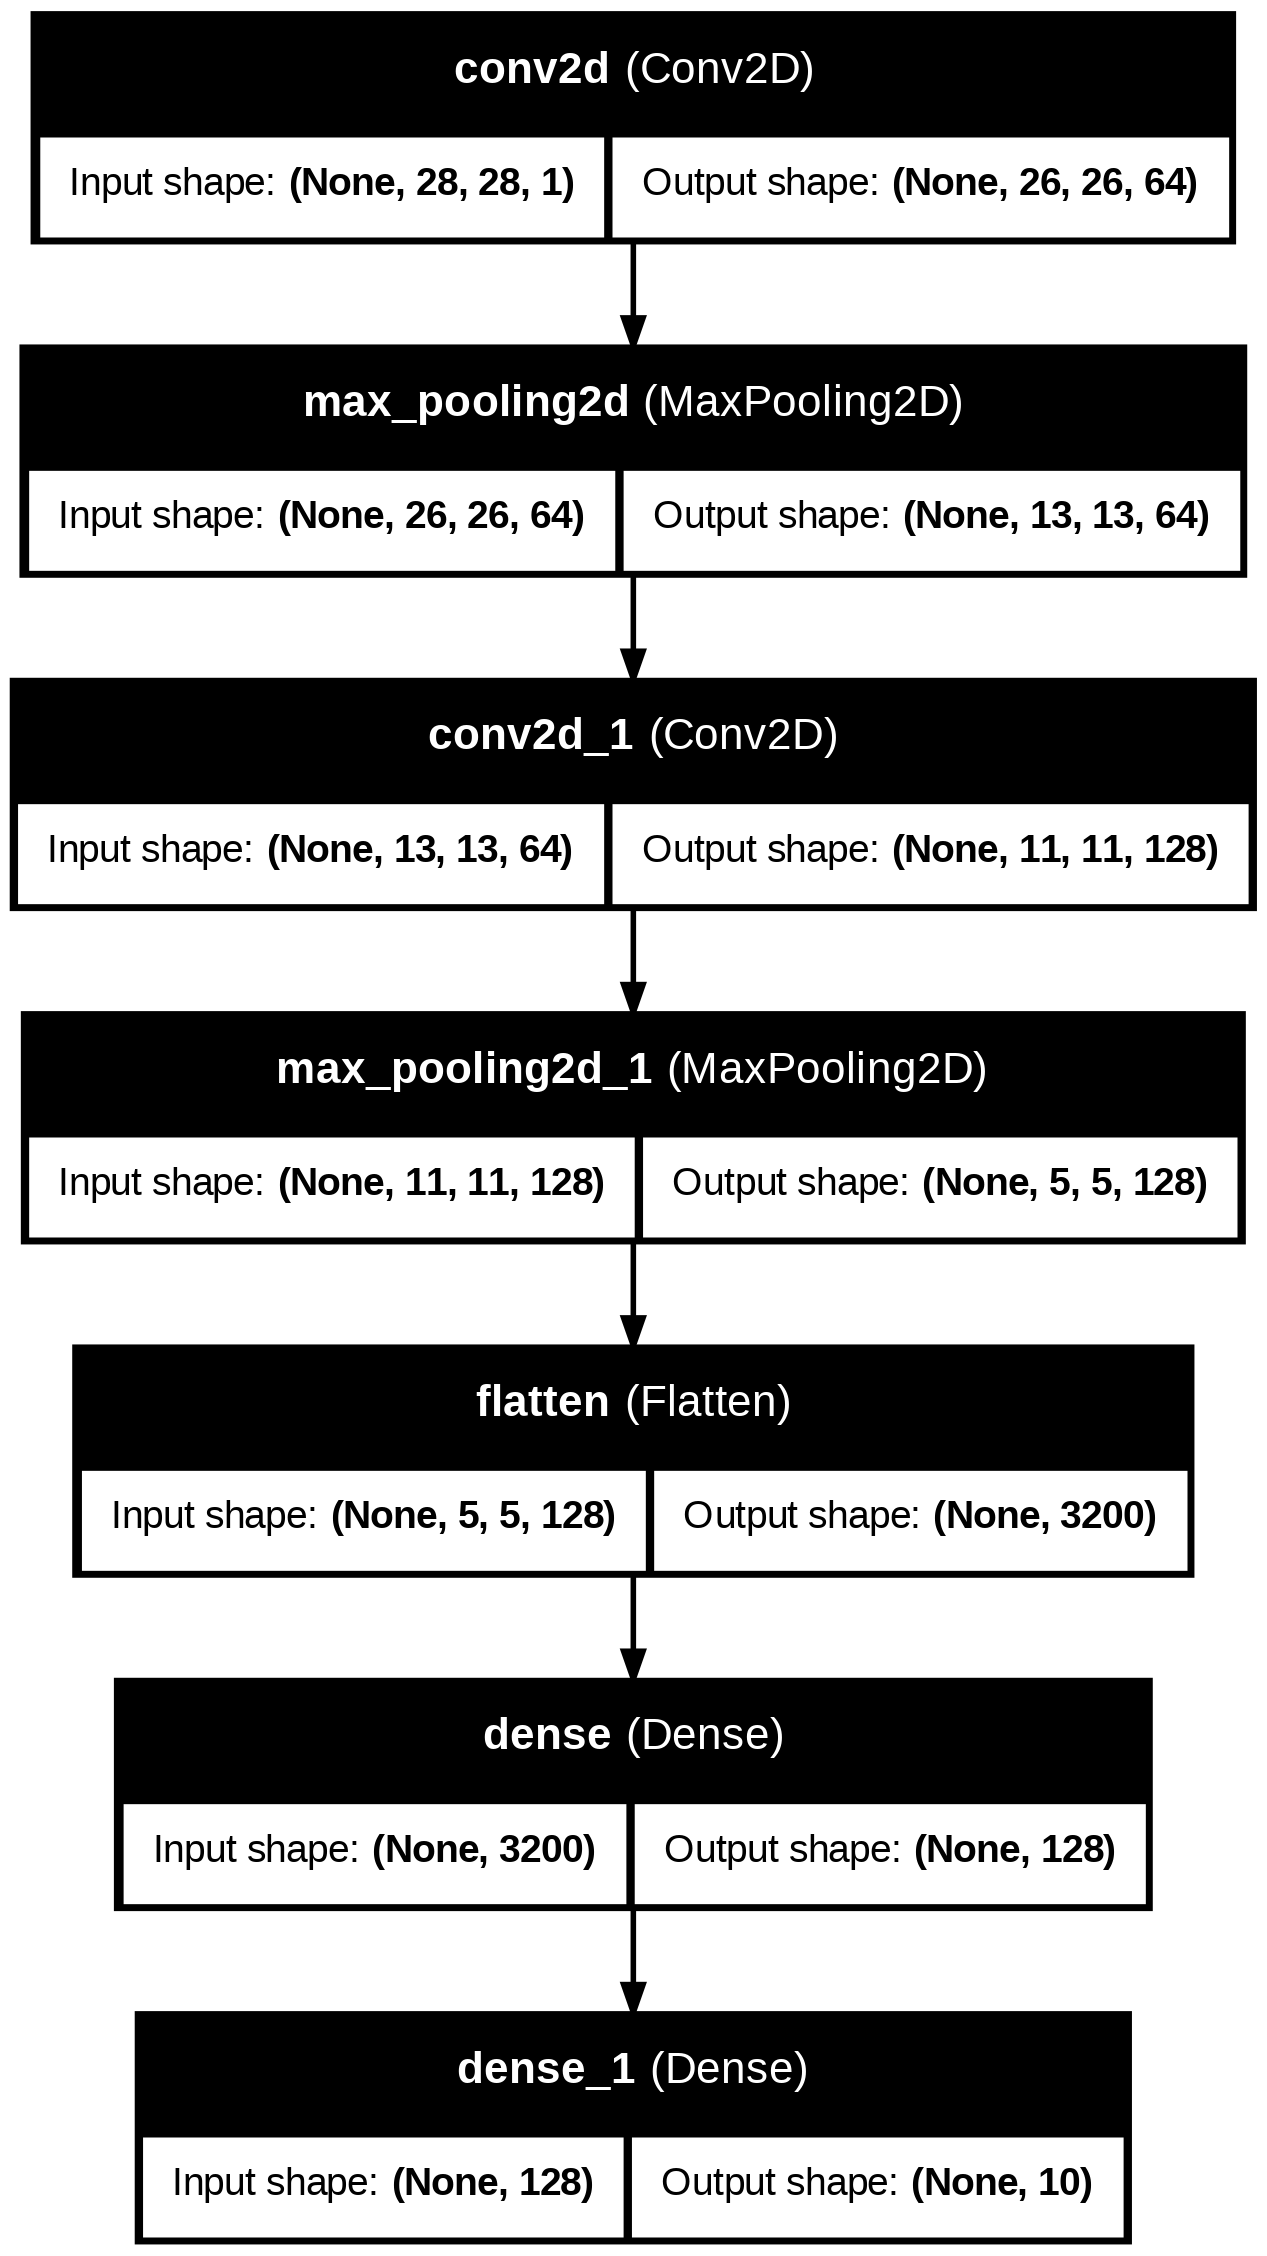

In [7]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

In [8]:
# Compiling the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluating the model
loss, accuracy = cnn.evaluate(X_test, y_test)

predictions = cnn.predict(X_test)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 111s 129ms/step - accuracy: 0.7639 - loss: 0.6524 - val_accuracy: 0.8732 - val_loss: 0.3393
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 139s 126ms/step - accuracy: 0.8849 - loss: 0.3150 - val_accuracy: 0.8855 - val_loss: 0.3101
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 107s 127ms/step - accuracy: 0.9041 - loss: 0.2688 - val_accuracy: 0.8963 - val_loss: 0.2752
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 141s 126ms/step - accuracy: 0.9136 - loss: 0.2298 - val_accuracy: 0.9070 - val_loss: 0.2522
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 142s 126ms/step - accuracy: 0.9271 - loss: 0.1996 - val_accuracy: 0.9028 - val_loss: 0.2670
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9036 - loss: 0.2910
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [9]:
loss, accuracy

(0.28371310234069824, 0.9018999934196472)

In [10]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0001369765%
1: 0.0000224569%
2: 0.0001054532%
3: 0.0000074061%
4: 0.0000386924%
5: 0.2306545852%
6: 0.0000652447%
7: 0.0118539028%
8: 0.0001381621%
9: 99.7569739819%


In [11]:
# Display incorrect predictions
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

len(incorrect_predictions)  # number of incorrect predictions

981

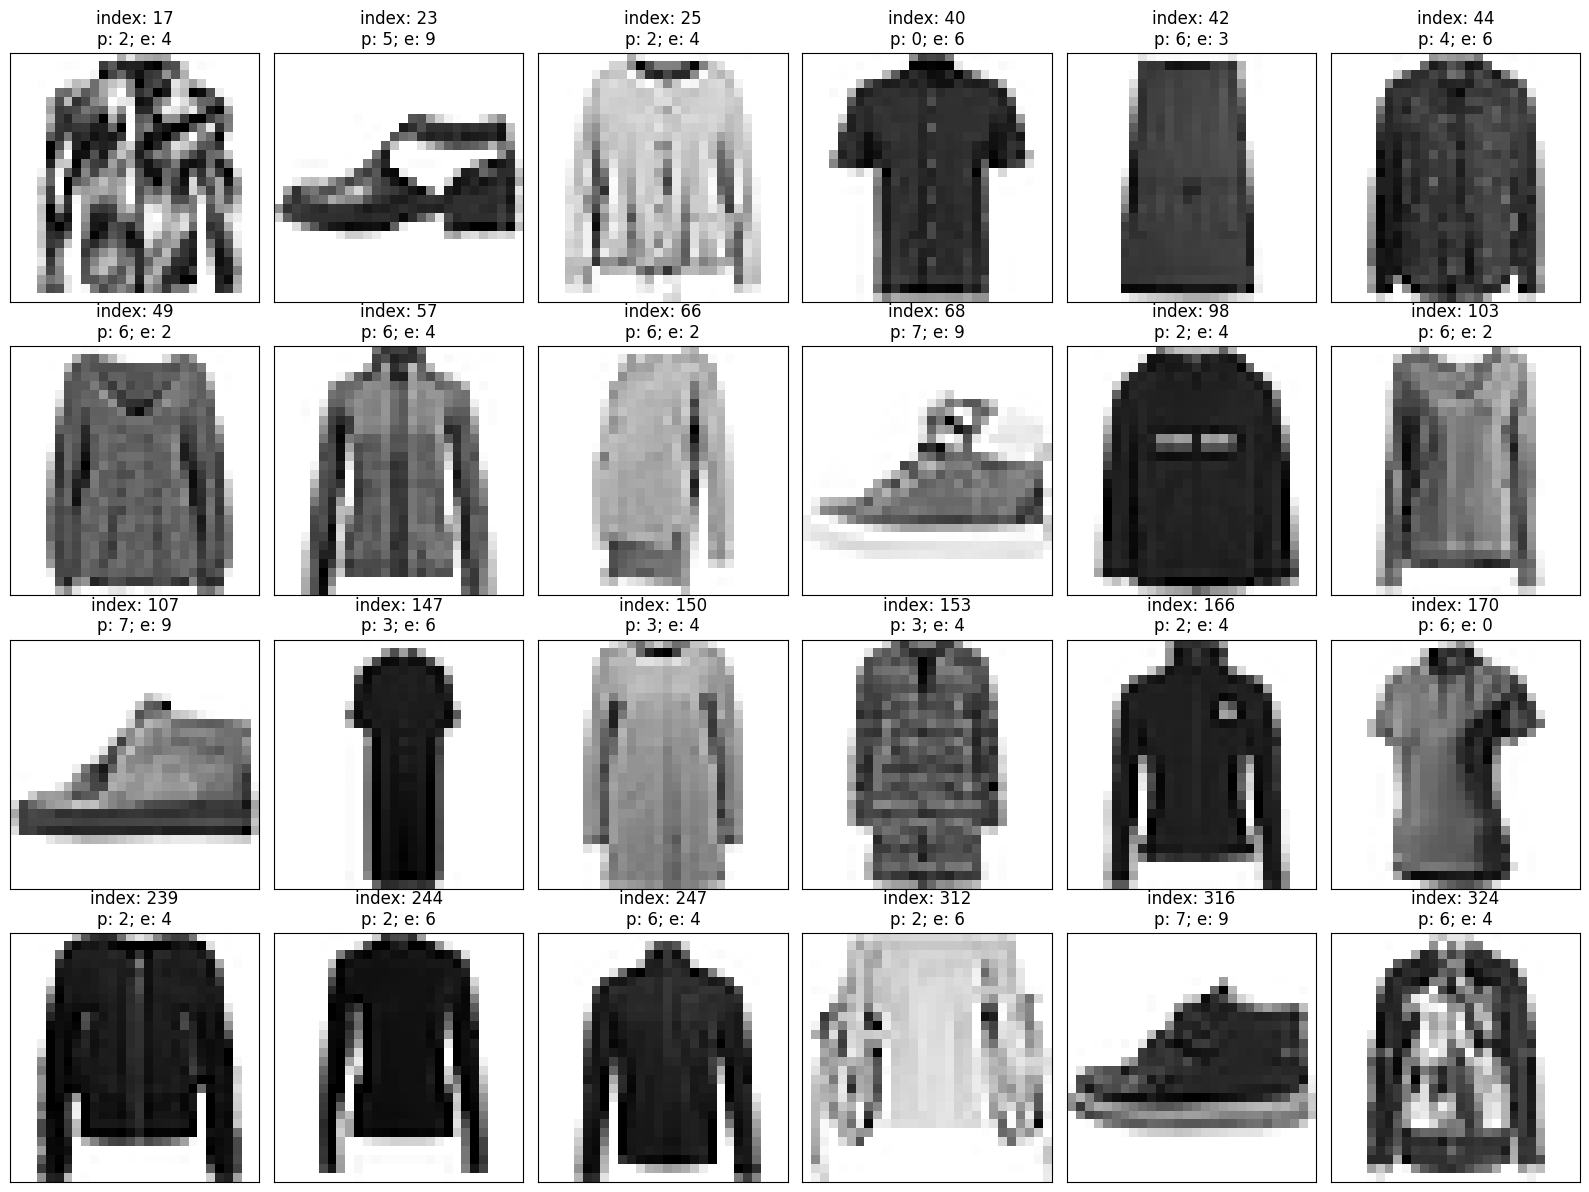

In [12]:
# Plot incorrect predictions
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [14]:
# Function to display probabilities
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

display_probabilities(predictions[340])
display_probabilities(predictions[740])
display_probabilities(predictions[1260])

cnn.save('fashion_mnist_cnn.keras')

0: 0.0244595751%
1: 0.0113725022%
2: 5.8609239757%
3: 0.1051676692%
4: 92.3600614071%
5: 0.0001070910%
6: 1.5747509897%
7: 0.0004204070%
8: 0.0600616448%
9: 0.0026655865%
0: 0.2430967987%
1: 0.0613667071%
2: 0.0176638569%
3: 98.3017981052%
4: 0.2951507224%
5: 0.0120528275%
6: 1.0600542650%
7: 0.0002859936%
8: 0.0034142806%
9: 0.0051286301%
0: 99.8042523861%
1: 0.0000421739%
2: 0.0077317447%
3: 0.0112937174%
4: 0.0000636631%
5: 0.0000007017%
6: 0.1765986090%
7: 0.0000000014%
8: 0.0000053947%
9: 0.0000009336%
